# Sources:
1. https://www.kaggle.com/gautham11/building-a-scikit-learn-classification-pipeline
2. https://habr.com/ru/company/ods/blog/326418/#rabota-s-kategorialnymi-priznakami-label-encoding-one-hot-encoding-hashing-trick
3. https://python-scripts.com/logging-python
4. https://habr.com/ru/company/ruvds/blog/451478/
5. https://towardsdatascience.com/10-simple-hacks-to-speed-up-your-data-analysis-in-python-ec18c6396e6b
6. https://towardsdatascience.com/why-exclude-highly-correlated-features-when-building-regression-model-34d77a90ea8e
7. https://mlbootcamp.ru/article/tutorial/
8. https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling #pandas profiling library
import pandasql as ps #library to use sql with pandas df
import matplotlib.pyplot as plt
import seaborn as sns #ploting library
sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
plt.style.use('ggplot') # make plots look like plots from R
%matplotlib inline

import logging #logging module

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups, load_files
from sklearn.model_selection import train_test_split #used to split dataset into train and test randomly
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')
import os
import re

from scipy.stats import norm
from scipy import stats

In [2]:
inc_points = pd.read_csv('inc_points_2.csv')
rich_tracks = pd.read_csv('rich_tracks_2.csv')
os_data = pd.read_csv('os.csv')

In [3]:
q1 = """SELECT case when TrackOrigin == 'Passanger' then 1 else 0 end ispassanger, inc_points.*, rich_tracks.*, os_data.*
        FROM inc_points join rich_tracks on inc_points.incomingtrackid=rich_tracks.incomingtrackid
                        join os_data on rich_tracks.DeviceToken=os_data.DeviceToken
     """
my_t = ps.sqldf(q1, locals())

In [4]:
#duplicate columns remover:
my_t = my_t.loc[:,~my_t.columns.duplicated()]

In [5]:
# #if we had to name columns:
# data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
# data.head()

In [6]:
cols_in_inc_points = list(inc_points.columns.values)
cols_in_rich_tracks = list(rich_tracks.columns.values)
cols_in_os_data = list(os_data.columns.values)
cols_to_analize = cols_in_inc_points + ["TrackOrigin"] + ["ispassanger"]

In [7]:
my_t.sample(round(my_t.shape[0]*0.000001))
# my_t.head()
# my_t.tail()

,ispassanger,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,...,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters,os_version
1020196,0,20677122,29.807998,45.463799,-73.629139,2019-10-17 06:49:30.0000000 -04:00,63308.0,0.0,0.0,1571309372,...,0.0,59.0,0.0,72.0,NaN,None,None,0.0,27.514722,iOS
181010,0,20692979,51.898438,41.041513,-73.577387,2019-10-17 08:26:09.0000000 -04:00,28034.0,0.0,0.0,1571315170,...,0.0,9.0,0.0,28.0,NaN,None,None,0.0,16.642942,iOS
2410436,0,20665097,67.338657,43.534018,39.816295,2019-10-17 11:36:37.0000000 +03:00,15186.0,0.0,0.0,1571301397,...,542.0,470.0,572.0,780.0,NaN,None,None,0.0,6.965563,iOS
3090939,1,20076859,0.000000,-38.146357,145.159955,2019-10-13 10:15:39.0000000 +11:00,46998.0,0.0,0.0,1570922233,...,9.0,716.0,18.0,742.0,1.0,None,None,0.0,22.182474,iOS


In [42]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.

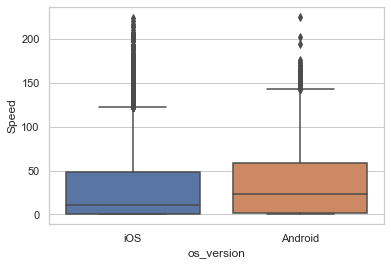

In [32]:
sns.boxplot(x="os_version", y="Speed", data=my_t)

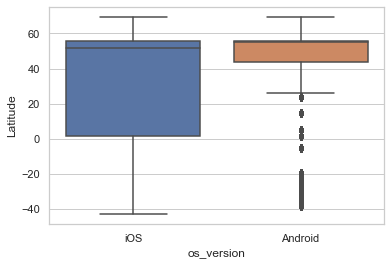

In [33]:
sns.boxplot(x="os_version", y="Latitude", data=my_t)

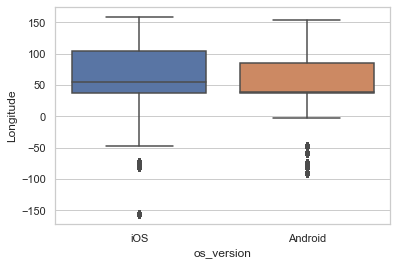

In [34]:
sns.boxplot(x="os_version", y="Longitude", data=my_t)

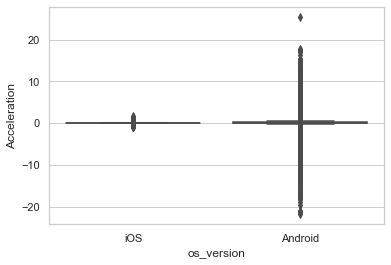

In [35]:
sns.boxplot(x="os_version", y="Acceleration", data=my_t)

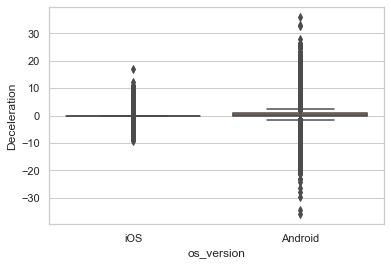

In [36]:
sns.boxplot(x="os_version", y="Deceleration", data=my_t)

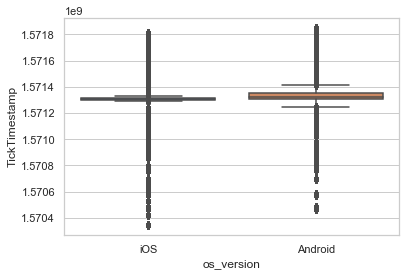

In [37]:
sns.boxplot(x="os_version", y="TickTimestamp", data=my_t)

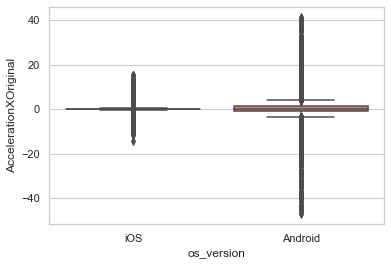

In [38]:
sns.boxplot(x="os_version", y="AccelerationXOriginal", data=my_t)

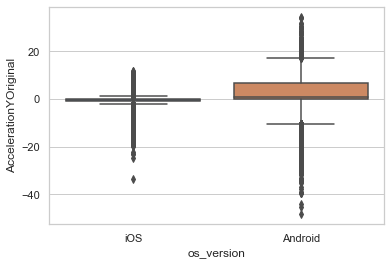

In [39]:
sns.boxplot(x="os_version", y="AccelerationYOriginal", data=my_t)

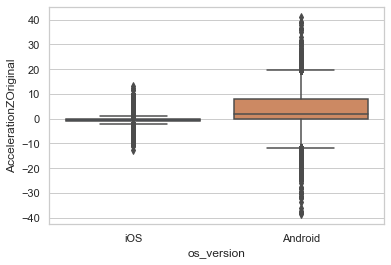

In [40]:
sns.boxplot(x="os_version", y="AccelerationZOriginal", data=my_t)

In [7]:
print(cols_to_analize)

['IncomingTrackId', 'Speed', 'Latitude', 'Longitude', 'PointDate', 'Height', 'Acceleration', 'Deceleration', 'TickTimestamp', 'AccelerationXOriginal', 'AccelerationYOriginal', 'AccelerationZOriginal', 'TrackOrigin', 'ispassanger']


In [8]:
my_t = my_t[cols_to_analize]

In [9]:
#check for NaNs
my_t.columns[my_t.isna().any()].tolist()

[]

In [10]:
# pandas_profiling.ProfileReport(my_t.sample(round(my_t.shape[0]*0.1)))

In [12]:
pandas_profiling.ProfileReport(my_t.sample(round(my_t.shape[0]*0.01)))

Lets drop TickTimestamp and Longitude due to correllation

In [11]:
my_t = my_t.drop(columns=['TickTimestamp', 'Longitude'])

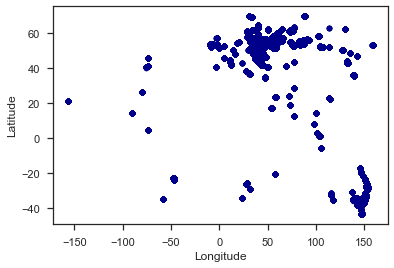

In [12]:
ax1 = my_t.sample(round(my_t.shape[0]*0.1)).plot.scatter(x='Longitude',
                      y='Latitude',
                      c='DarkBlue')

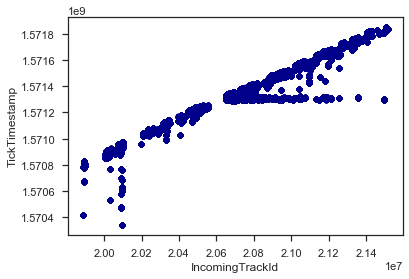

In [21]:
ax2 = my_t.sample(round(my_t.shape[0]*0.1)).plot.scatter(x='IncomingTrackId',
                      y='TickTimestamp',
                      c='DarkBlue')

In [13]:
my_t.shape

(3822689, 14)

In [14]:
my_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822689 entries, 0 to 3822688
Data columns (total 12 columns):
IncomingTrackId          int64
Speed                    float64
Latitude                 float64
PointDate                object
Height                   float64
Acceleration             float64
Deceleration             float64
AccelerationXOriginal    float64
AccelerationYOriginal    float64
AccelerationZOriginal    float64
TrackOrigin              object
ispassanger              int64
dtypes: float64(8), int64(2), object(2)
memory usage: 350.0+ MB


In [15]:
my_t.describe()

,IncomingTrackId,Speed,Latitude,Height,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,ispassanger
count,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06
mean,2.069676e+07,2.805110e+01,3.205446e+01,1.257628e+05,5.859348e-02,1.145132e-01,9.780570e-02,3.216236e-01,3.199528e-01,2.416187e-01
std,2.340588e+05,3.251927e+01,3.588891e+01,1.561878e+05,7.221290e-01,1.111087e+00,1.766374e+00,2.733806e+00,2.898338e+00,4.280644e-01
min,1.988839e+07,0.000000e+00,-4.315735e+01,-4.500000e+05,-2.189765e+01,-3.603381e+01,-4.738030e+01,-4.837484e+01,-3.865796e+01,0.000000e+00
25%,2.066303e+07,8.261786e-02,1.352203e+00,3.383600e+04,0.000000e+00,0.000000e+00,-2.192993e-01,-6.949768e-01,-8.495789e-01,0.000000e+00
50%,2.068272e+07,1.304783e+01,5.267011e+01,1.097650e+05,0.000000e+00,0.000000e+00,0.000000e+00,-6.968689e-02,-3.171387e-01,0.000000e+00
75%,2.071867e+07,5.109833e+01,5.576547e+01,1.639000e+05,0.000000e+00,0.000000e+00,1.961823e-01,3.924103e-01,2.822266e-01,0.000000e+00
max,2.151483e+07,2.251463e+02,6.949774e+01,3.087814e+06,2.549077e+01,3.598226e+01,4.149518e+01,3.452544e+01,4.120547e+01,1.000000e+00


In [16]:
my_t['ispassanger'].value_counts()

0    2899056
1     923633
Name: ispassanger, dtype: int64

In [17]:
# train, test = train_test_split(my_t[cols_to_analize], test_size=0.2)

# print(train.shape)
# print(test.shape)

KeyError: "['Longitude', 'TickTimestamp'] not in index"

All unique TrackOrigin values:

In [18]:
my_t['TrackOrigin'].unique()

array(['OriginalDriver', 'Passanger', 'Taxi'], dtype=object)

In [17]:
# sns.pairplot(my_t, hue='ispassanger', size=3)

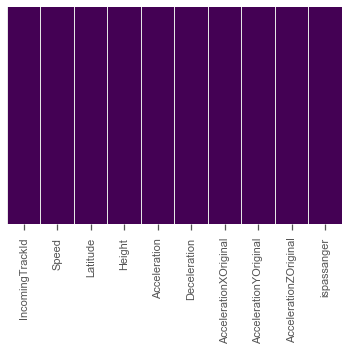

In [33]:
sns.heatmap(my_t.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
my_t.isnull().sum().sort_values(ascending=False)

ispassanger              0
TrackOrigin              0
AccelerationZOriginal    0
AccelerationYOriginal    0
AccelerationXOriginal    0
TickTimestamp            0
Deceleration             0
Acceleration             0
Height                   0
PointDate                0
Longitude                0
Latitude                 0
Speed                    0
IncomingTrackId          0
IncomingTrackId          0
dtype: int64

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='ispassanger',data=train,palette='RdBu_r')

NameError: name 'train' is not defined

In [ ]:
# set the background style of the plot 
sns.set_style('whitegrid') 
sns.distplot(my_t['Speed'], kde = False, color ='darkred', bins = 30) 

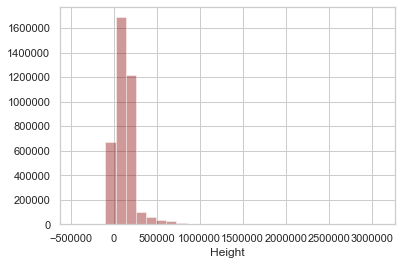

In [22]:
# set the background style of the plot 
sns.set_style('whitegrid') 
sns.distplot(my_t['Height'], kde = False, color ='darkred', bins = 30) 

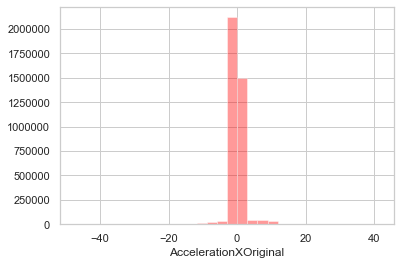

In [18]:
# set the background style of the plot 
sns.set_style('whitegrid') 
sns.distplot(my_t['AccelerationXOriginal'], kde = False, color ='darkred', bins = 30) 

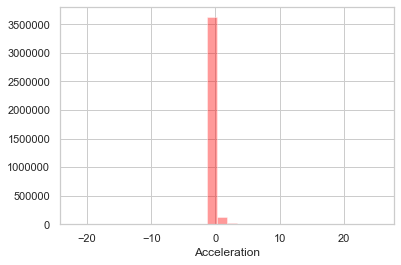

In [26]:
# set the background style of the plot 
sns.set_style('whitegrid') 
sns.distplot(my_t['Acceleration'], kde = False, color ='darkred', bins = 30) 

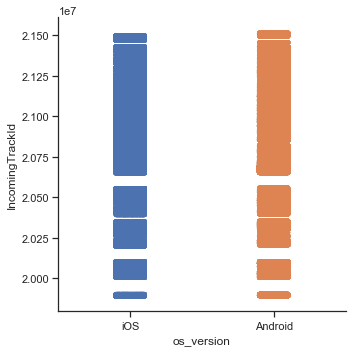

In [11]:
sns.catplot(x="os_version", y="IncomingTrackId", data=my_t[['IncomingTrackId', 'os_version']].iloc[:, [1, 2]])

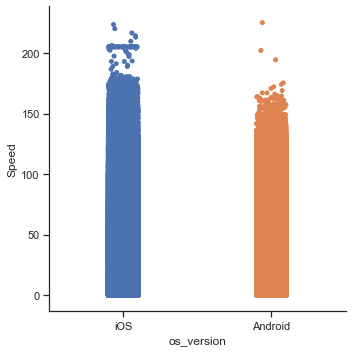

In [12]:
sns.catplot(x="os_version", y="Speed", data=my_t[['Speed', 'os_version']])

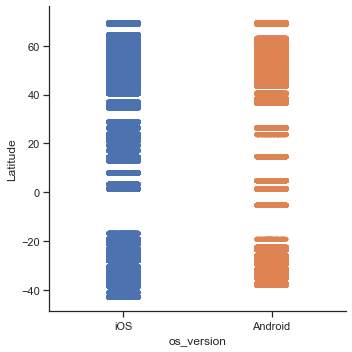

In [13]:
sns.catplot(x="os_version", y="Latitude", data=my_t[['Latitude', 'os_version']])

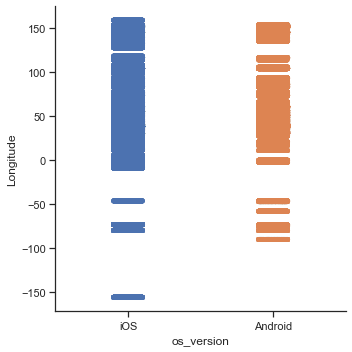

In [14]:
sns.catplot(x="os_version", y="Longitude", data=my_t[['Longitude', 'os_version']])

In [64]:
# sns.catplot(x="os_version", y="PointDate", data=my_t[['PointDate', 'os_version']])

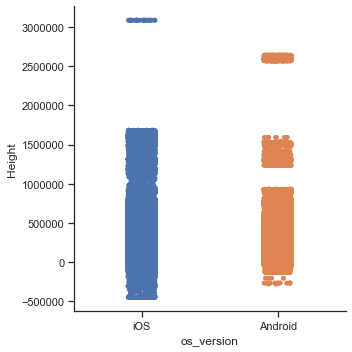

In [17]:
sns.catplot(x="os_version", y="Height", data=my_t[['Height', 'os_version']])

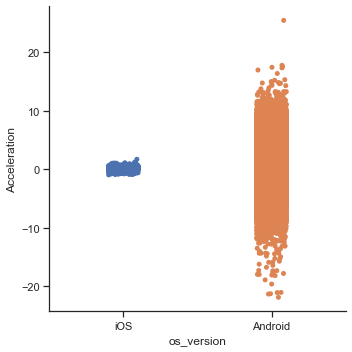

In [18]:
sns.catplot(x="os_version", y="Acceleration", data=my_t[['Acceleration', 'os_version']])

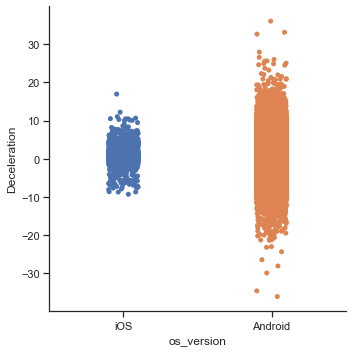

In [19]:
sns.catplot(x="os_version", y="Deceleration", data=my_t[['Deceleration', 'os_version']])

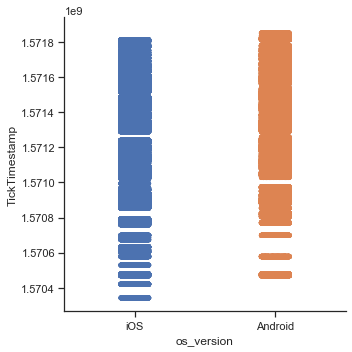

In [20]:
sns.catplot(x="os_version", y="TickTimestamp", data=my_t[['TickTimestamp', 'os_version']])

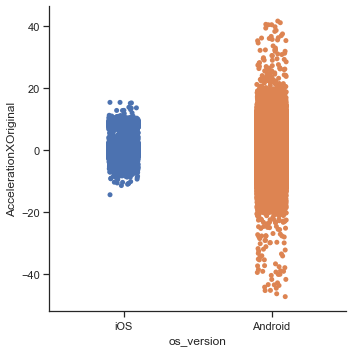

In [21]:
sns.catplot(x="os_version", y="AccelerationXOriginal", data=my_t[['AccelerationXOriginal', 'os_version']])

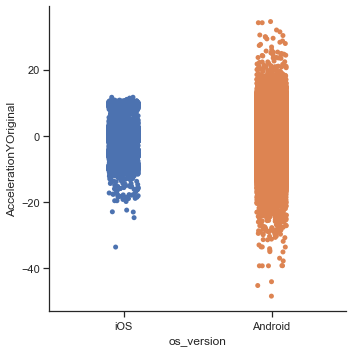

In [22]:
sns.catplot(x="os_version", y="AccelerationYOriginal", data=my_t[['AccelerationYOriginal', 'os_version']])

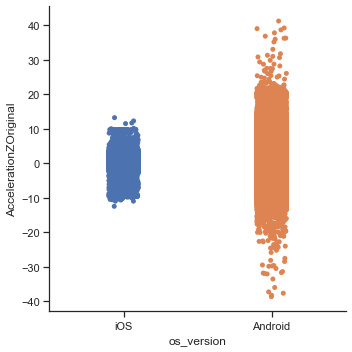

In [7]:
sns.catplot(x="os_version", y="AccelerationZOriginal", data=my_t[['AccelerationZOriginal', 'os_version']])

In [65]:
# my_t.loc[my_t['os_version'] == 'iOS', 'AccelerationZOriginal'] *= 9.81
# print (my_t[['AccelerationZOriginal', 'os_version']])

In [66]:
# sns.catplot(x="os_version", y="AccelerationZOriginal", data=my_t[['AccelerationZOriginal', 'os_version']])

In [8]:
my_t['AccelerationZOriginal_zscore'] = (my_t.AccelerationZOriginal - my_t.AccelerationZOriginal.mean())/my_t.AccelerationZOriginal.std(ddof=0)
# my_t['AccelerationZOriginal_zscore']

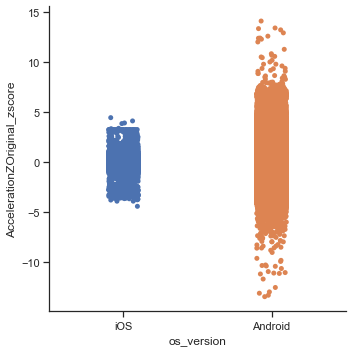

In [9]:
sns.catplot(x="os_version", y="AccelerationZOriginal_zscore", data=my_t[['AccelerationZOriginal_zscore', 'os_version']])

# Lets normalize!

In [12]:
categorical_columns = [c for c in my_t.columns if my_t[c].dtype.name == 'object']
numerical_columns   = [c for c in my_t.columns if my_t[c].dtype.name != 'object']
numerical_columns.remove('ispassanger')
print(categorical_columns)
print(numerical_columns)

['PointDate', 'TrackOrigin']
['IncomingTrackId', 'Speed', 'Latitude', 'Height', 'Acceleration', 'Deceleration', 'AccelerationXOriginal', 'AccelerationYOriginal', 'AccelerationZOriginal']


In [13]:
for c in categorical_columns:
    print(my_t[c].unique())

['2019-10-17 15:35:23.0000000 +03:00' '2019-10-17 15:35:34.0000000 +03:00'
 '2019-10-17 15:37:28.0000000 +03:00' ...
 '2019-10-23 12:34:44.0000000 +04:00' '2019-10-23 12:34:45.0000000 +04:00'
 '2019-10-23 12:34:46.0000000 +04:00']
['OriginalDriver' 'Passanger' 'Taxi']


In [14]:
data_numerical = my_t[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,IncomingTrackId,Speed,Latitude,Height,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06,3.822689e+06
mean,-1.359237e-13,-5.343200e-13,-3.101774e-13,-1.227142e-14,-2.693514e-15,2.428010e-13,-1.568428e-14,-2.918194e-14,7.152220e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.453707e+00,-8.625992e-01,-2.095684e+00,-3.686349e+00,-3.040488e+01,-3.253421e+01,-2.687885e+01,-1.781270e+01,-1.344837e+01
25%,-1.440812e-01,-8.600586e-01,-8.554802e-01,-5.885655e-01,-8.113991e-02,-1.030642e-01,-1.795231e-01,-3.718626e-01,-4.035180e-01
50%,-5.999127e-02,-4.613654e-01,5.744294e-01,-1.024264e-01,-8.113991e-02,-1.030642e-01,-5.537089e-02,-1.431376e-01,-2.198127e-01
75%,9.360261e-02,7.087255e-01,6.606778e-01,2.441756e-01,-8.113991e-02,-1.030642e-01,5.569406e-02,2.589308e-02,-1.301652e-02
max,3.495149e+00,6.060875e+00,1.043311e+00,1.896468e+01,3.521833e+01,3.228169e+01,2.343636e+01,1.251143e+01,1.410654e+01


In [15]:
my_t.corr()

,IncomingTrackId,Speed,Latitude,Height,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,ispassanger
IncomingTrackId,1.000000,0.002102,-0.004071,-0.005549,-0.052157,-0.046804,0.034443,-0.015440,-0.056028,-0.012879
Speed,0.002102,1.000000,-0.034040,0.031186,0.091160,0.097190,0.024746,0.032559,0.019935,0.171790
Latitude,-0.004071,-0.034040,1.000000,0.179127,0.040839,0.023996,-0.026691,0.046991,0.014901,-0.170309
Height,-0.005549,0.031186,0.179127,1.000000,0.005971,0.008611,0.035961,0.070371,0.082406,-0.037993
Acceleration,-0.052157,0.091160,0.040839,0.005971,1.000000,0.725050,0.122529,0.051841,0.023492,0.008777
Deceleration,-0.046804,0.097190,0.023996,0.008611,0.725050,1.000000,0.129884,0.043225,0.070855,0.034770
AccelerationXOriginal,0.034443,0.024746,-0.026691,0.035961,0.122529,0.129884,1.000000,0.006041,0.010421,0.039196
AccelerationYOriginal,-0.015440,0.032559,0.046991,0.070371,0.051841,0.043225,0.006041,1.000000,0.192393,0.075533
AccelerationZOriginal,-0.056028,0.019935,0.014901,0.082406,0.023492,0.070855,0.010421,0.192393,1.000000,0.070895
ispassanger,-0.012879,0.171790,-0.170309,-0.037993,0.008777,0.034770,0.039196,0.075533,0.070895,1.000000


In [16]:
my_t = pd.concat((data_numerical, my_t['ispassanger']), axis=1)
my_t = pd.DataFrame(my_t, dtype=float)
print (my_t.shape)
print (my_t.columns)

(3822689, 10)
Index(['IncomingTrackId', 'Speed', 'Latitude', 'Height', 'Acceleration',
       'Deceleration', 'AccelerationXOriginal', 'AccelerationYOriginal',
       'AccelerationZOriginal', 'ispassanger'],
      dtype='object')


In [17]:
# model = ExtraTreesClassifier()
# model.fit(X, y)
# # display the relative importance of each attribute
# print(model.feature_importances_)

In [18]:
my_cols = set(my_t.columns)
print(my_cols)

{'Deceleration', 'Height', 'AccelerationYOriginal', 'AccelerationZOriginal', 'ispassanger', 'Acceleration', 'AccelerationXOriginal', 'IncomingTrackId', 'Speed', 'Latitude'}


In [19]:
my_cols = set(my_t.columns)
# my_cols.remove('TrackOrigin')
# my_cols.remove('os_version')
# my_cols.remove('OriginalTrackOrigin')
# my_cols.remove('PointDate')
my_cols.remove('ispassanger')

In [20]:
y = my_t['ispassanger']
X = my_t[my_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
feature_names = X.columns
print(feature_names)

Index(['Deceleration', 'Height', 'AccelerationYOriginal',
       'AccelerationZOriginal', 'Acceleration', 'AccelerationXOriginal',
       'IncomingTrackId', 'Speed', 'Latitude'],
      dtype='object')


In [21]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

3058151 764538


KNN

In [ ]:
knn = KNeighborsClassifier(n_jobs=10)
knn.fit(X_train, y_train)

In [ ]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

RF

In [24]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11, n_jobs=10)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 1.0463835675924545e-05


In [22]:
# Разделяем на признаки и объекты
# X, y = df[cols].copy(), np.asarray(df["Churn"],dtype='int8')

# Инициализируем страифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем долю верных ответов на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 100.00%


In [30]:
y.value_counts()

0.0    2899056
1.0     923633
Name: ispassanger, dtype: int64

In [39]:
# Random Forest
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.title("Случайный лес")
plt.show()

NameError: name 'X_train_circles' is not defined

In [32]:
rf = RandomForestClassifier()
print('RF: ', cross_val_score(rf, X, y, scoring='neg_log_loss').mean())


RF:  -1.7841748281676058


In [33]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
print(rf.feature_importances_)

[0.00837667 0.01427441 0.03072927 0.00642679 0.02300602 0.15630156
 0.70015376 0.04300652 0.01772501]


In [47]:
rf.feature_names

AttributeError: 'RandomForestClassifier' object has no attribute 'feature_names'

In [40]:
modelLR = LogisticRegression(penalty='l2', n_jobs=-1, max_iter=100)
modelLR.fit(X, y)
print(modelLR)
# make predictions
expected = y
predicted = modelLR.predict(X)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

# Обучаем на тренировочном датасете
results = cross_val_score(modelLR, X, y, cv=skf)

# Оцениваем долю верных ответов на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

         0.0       0.77      0.98      0.87   2899056
         1.0       0.65      0.09      0.16    923633

    accuracy                           0.77   3822689
   macro avg       0.71      0.54      0.52   3822689
weighted avg       0.74      0.77      0.70   3822689

[[2853087   45969]
 [ 836575   87058]]
CV accuracy score: 76.91%


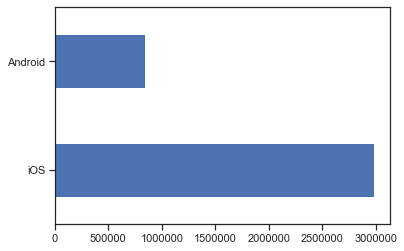

In [11]:
my_t['os_version'].value_counts().plot.barh();

{0: 'Android', 1: 'iOS'}


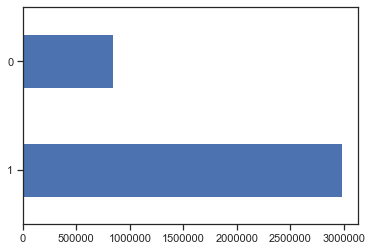

In [12]:
label_encoder = LabelEncoder()

mapped_os_version = pd.Series(label_encoder.fit_transform(my_t['os_version']))
mapped_os_version.value_counts().plot.barh()
print(dict(enumerate(label_encoder.classes_)))